In [1]:
import os, time
import numpy as np
import pandas as pd
import config.hyperparams as hp
from tqdm.notebook import trange, tqdm
from entities.solver_process import SolverProcess  
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from multiprocessing import Queue
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


 12%|█▎        | 2/16 [00:00<00:05,  2.68it/s]

File not found!


 18%|█▊        | 4/22 [00:01<00:06,  2.96it/s]

File not found!


100%|██████████| 4/4 [00:01<00:00,  2.39it/s]]

File not found!


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]]

  2%|▎         | 1/40 [00:00<00:21,  1.82it/s]]

File not found!


 43%|████▎     | 3/7 [00:01<00:02,  1.94it/s]]

File not found!


  5%|▍         | 1/22 [00:00<00:10,  2.03it/s]

File not found!


  5%|▌         | 2/40 [00:01<00:22,  1.68it/s]]

File not found!


 17%|█▋        | 2/12 [00:01<00:05,  1.72it/s]

File not found!
File not found!


 50%|█████     | 4/8 [00:02<00:02,  1.73it/s]]

File not found!


 75%|███████▌  | 3/4 [00:02<00:00,  1.51it/s]]

File not found!


 29%|██▊       | 6/21 [00:03<00:08,  1.85it/s]

File not found!


 71%|███████▏  | 5/7 [00:02<00:01,  1.67it/s]]]

  6%|▌         | 5/83 [00:02<00:44,  1.77it/s]]

 22%|██▏       | 2/9 [00:01<00:05,  1.33it/s]]

File not found!


 75%|███████▌  | 6/8 [00:03<00:01,  1.43it/s]]]

File not found!


 50%|█████     | 2/4 [00:01<00:01,  1.28it/s]s]]

File not found!


 18%|█▊        | 4/22 [00:02<00:13,  1.36it/s]]

File not found!


 39%|███▊      | 12/31 [00:06<00:14,  1.34it/s]

File not found!


  0%|          | 0/1 [00:00<?, ?it/s].29it/s]]s]

File not found!


 50%|█████     | 3/6 [00:02<00:02,  1.22it/s]]

File not found!


 15%|█▌        | 6/40 [00:04<00:25,  1.34it/s]]

File not found!


 58%|█████▊    | 7/12 [00:04<00:03,  1.31it/s]]

File not found!


 25%|██▌       | 5/20 [00:04<00:12,  1.18it/s]

File not found!


  0%|          | 0/1 [00:00<?, ?it/s].08it/s]s]

File not found!


 37%|███▋      | 13/35 [00:07<00:17,  1.25it/s]

 75%|███████▌  | 3/4 [00:02<00:00,  1.16it/s]s]

File not found!


  6%|▌         | 4/69 [00:03<00:54,  1.19it/s]s]

File not found!


 69%|██████▉   | 9/13 [00:07<00:03,  1.15it/s]]

File not found!


  4%|▍         | 1/25 [00:00<00:20,  1.18it/s]]]

File not found!


100%|██████████| 14/14 [00:10<00:00,  1.37it/s]

100%|██████████| 13/13 [00:09<00:00,  1.30it/s]



File not found!


  6%|▌         | 1/17 [00:01<00:16,  1.01s/it]]

File not found!


 71%|███████▏  | 5/7 [00:04<00:01,  1.05it/s]]]

File not found!


 13%|█▎        | 9/69 [00:08<00:56,  1.05it/s]]

File not found!


  9%|▊         | 4/46 [00:04<00:46,  1.10s/it]]

File not found!


 33%|███▎      | 2/6 [00:02<00:04,  1.09s/it]t]]

File not found!


 37%|███▋      | 19/52 [00:16<00:33,  1.03s/it]

100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

File not found!


 21%|██        | 4/19 [00:04<00:15,  1.04s/it]

 75%|███████▌  | 12/16 [00:12<00:04,  1.06s/it]

File not found!


 19%|█▉        | 11/57 [00:11<00:49,  1.09s/it]

File not found!


 37%|███▋      | 7/19 [00:07<00:12,  1.02s/it]]

 77%|███████▋  | 27/35 [00:21<00:08,  1.03s/it]]

File not found!


100%|██████████| 1/1 [00:01<00:00,  1.12s/it]t]

 78%|███████▊  | 28/36 [00:23<00:07,  1.01it/s]

File not found!



100%|██████████| 3/3 [00:02<00:00,  1.08it/s]t]

File not found!



 31%|███       | 4/13 [00:04<00:09,  1.02s/it]]


File not found!


 39%|███▉      | 27/69 [00:25<00:40,  1.04it/s]

 55%|█████▍    | 6/11 [00:05<00:04,  1.15it/s]]

File not found!


 76%|███████▋  | 13/17 [00:12<00:03,  1.18it/s]

 39%|███▉      | 19/49 [00:18<00:25,  1.19it/s]

File not found!


 67%|██████▋   | 8/12 [00:06<00:02,  1.35it/s]]


File not found!


 62%|██████▏   | 13/21 [00:11<00:05,  1.44it/s]]

File not found!


 39%|███▊      | 12/31 [00:10<00:13,  1.36it/s]

 92%|█████████▏| 11/12 [00:08<00:00,  1.68it/s]

File not found!


 58%|█████▊    | 19/33 [00:13<00:06,  2.24it/s]]

 82%|████████▏ | 18/22 [00:11<00:01,  2.49it/s]]

 91%|█████████ | 20/22 [00:11<00:00,  2.94it/s]]

File not found!


100%|██████████| 53/53 [00:38<00:00,  1.37it/s]]

File not found!


100%|██████████| 56/56 [00:38<00:00,  1.45it/s]

100%|██████████| 152/152 [00:49<00:00,  3.09it/s]


In [2]:
def start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data, cloud_only=False, connection='lte'):
    if cloud_only:
        env, agents_a, edge_nodes_e, convergence_time, _ = \
            solver.algorithm_cloud(agents, edge_nodes, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True, connection=connection)
    else:
        env, agents_a, edge_nodes_e, convergence_time, _ = \
            solver.algorithm_v3(agents, edge_nodes, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True, connection=connection)

    result = (env, agents_a, edge_nodes_e, convergence_time)

    if hp.STORE_RESULTS:
        env.episodes_tracker[:,:,episode]
        np.savetxt(hp.CSV_FOLDER + '/' + str(episode) + '.csv', env.episodes_tracker[:,:,episode], delimiter=',')
    
    return result


In [3]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_ABS = np.array([100])
T2_RATIO_VEC_ABS = np.array([50])
T3_RATIO_VEC_ABS = np.array([2])

target_ma = 1000

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

data = original_data[(original_data.total >= target_ma) & (original_data.total < (target_ma*1.1))].sample()
merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

MA = int(data.total)
total_ap = len(merged_raw_ap_data.columns)


TIER_1_EN = T1_RATIO_VEC_ABS[0]
TIER_2_EN = T2_RATIO_VEC_ABS[0]
TIER_3_EN = T3_RATIO_VEC_ABS[0]

EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

if hp.dataset_rtt:
    ### LOAD LATENCY MATRIX FROM DATASET ###
    print("Loading rtt matrix from dataset")
    clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
    #clf.weights_ = [0.2, 0.2, 0.6]
    rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
else:
    # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
    rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
    rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
    rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

    sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

    rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])
    
# np.random.shuffle(rtt_matrix)
disarrange(rtt_matrix, axis=0)

# Manually setting latency for colocated AP/EN
for i in range(int(round(TIER_1_EN/1))):
    rtt_matrix[i][i] = 1

dim = 0
iterations = 100

Total APs: 4371
Loading rtt matrix from dataset


In [4]:
FPS = [10, 10, 10, 10]
k = [0,5,0,0]
greed = [False, True, False, False]
cloud = [False, False, True, True]
alpha = [0.7, 1, 0.7, 0.7]
beta = [0.3, 0, 0.3, 0.3]
connection = ['wifi', 'wifi', 'wifi', 'lte']
RESULT = []

for j in range(len(FPS)):
    print("Set: {}".format(j))
    hp.FPS = np.random.normal(FPS[j], 2, 50)
    hp.local_search_scope = k[j]
    hp.greedy = greed[j]
    hp.alpha = alpha[j]
    hp.beta = beta[j]
    
    for i in range(iterations):
        agents = generate_agents(MA, merged_raw_ap_data, dim)
        edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, dim)
        RESULT.append(start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data, cloud[j], connection[j]))

Set: 0
Set: 1
Set: 2
Set: 3


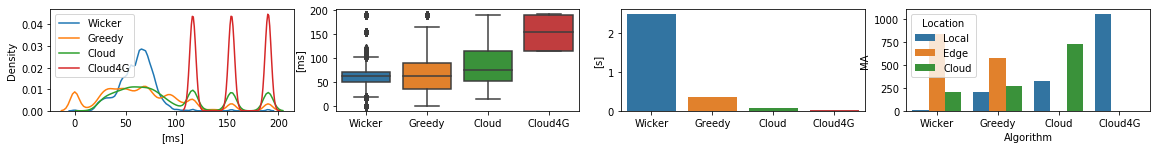

In [103]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
list_of_groups2 = zip(*(iter(RESULT),) * iterations)
LABELS = ["Wicker", "Greedy", "Cloud", "Cloud4G"]

lat_list = []
conv_list = []
df = pd.DataFrame(columns=['Algorithm', 'MA', 'Location'])

## Latency
for i, gr in enumerate(list_of_groups2):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], gr)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=LABELS[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], gr))))
    
    agents = np.concatenate(list(map(lambda z: z[1], gr))) 
    
    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Algorithm': LABELS[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)
    
sns.boxplot(x=LABELS, y=lat_list, ax=ax[1])
sns.barplot(x=LABELS, y=conv_list, ax=ax[2])
g = sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=ax[3])

#g.text(2,10,4, color='red', ha="center")

ax[0].set_ylabel("Density")
ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)
fig.savefig("../plots/baseline/comparison.pdf",  bbox_inches="tight")

In [80]:
k = [1,5,10,25,50,75,100,0]
LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]
result_kl = []

for ke in k:
    hp.local_search_scope = ke
    print("κ: {}".format(ke))
    
    for i in range(iterations):
        agents = generate_agents(MA, merged_raw_ap_data, dim)
        edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, dim)
        result_kl.append(start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data))

κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0


ValueError: x and y must have same first dimension, but have shapes (4,) and (8,)

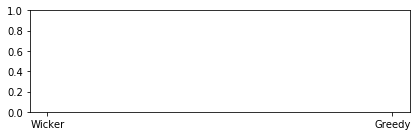

In [93]:
list_of_groups = zip(*(iter(result_kl),) * iterations)

conv_time = []
cov = []

fig, ax = plt.subplots(1, 1, figsize=(6, 2), constrained_layout=False)
fig.tight_layout()

for re in list_of_groups:
    conv_time.append(np.median(list(map(lambda b: b[3], re))))
    
    agents = np.concatenate(list(map(lambda z: z[1], re))) 
    cov.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations / MA * 100)

    
ax.plot(LABELS, conv_time, marker="o", label="Convergence Time")
ax.set_ylabel("[s]")
ax.set_xlabel("κ")
ax.set_title("EN: {} - MA: {}".format(TOTAL_EN, MA))
ax.grid()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('(%)')  # we already handled the x-label with ax1
ax2.plot(LABELS, cov, marker="*", color=color, label="Edge offloaded MA")
ax2.tick_params(axis='y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4)

fig.savefig("../plots/baseline/kappa_tradeoff.pdf",  bbox_inches="tight")

# added plots

In [138]:
import matplotlib

plt.style.use('classic')

matplotlib.rcParams['axes.facecolor'] = 'w'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 3
matplotlib.rcParams['lines.color'] = 'xkcd:blue'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

width = 7
height = width / 1.618

# Use matplotlib fonts
matplotlib.rcParams['text.usetex']=True

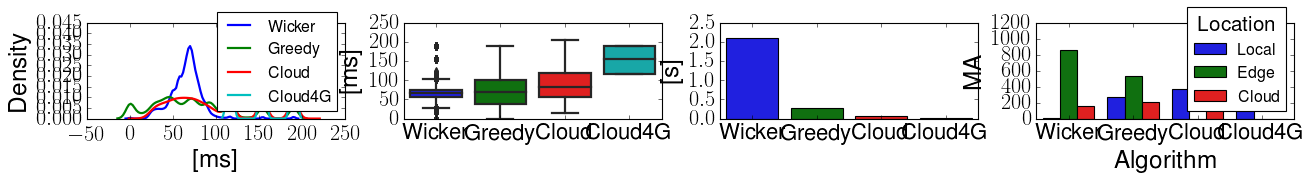

In [12]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
list_of_groups2 = zip(*(iter(RESULT),) * iterations)
LABELS = ["Wicker", "Greedy", "Cloud", "Cloud4G"]

lat_list = []
conv_list = []
df = pd.DataFrame(columns=['Algorithm', 'MA', 'Location'])

## Latency
for i, gr in enumerate(list_of_groups2):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], gr)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=LABELS[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], gr))))
    
    agents = np.concatenate(list(map(lambda z: z[1], gr))) 
    
    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Algorithm': LABELS[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)
    
sns.boxplot(x=LABELS, y=lat_list, ax=ax[1])
sns.barplot(x=LABELS, y=conv_list, ax=ax[2])
g = sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=ax[3])

#g.text(2,10,4, color='red', ha="center")

ax[0].set_ylabel("Density")
ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)

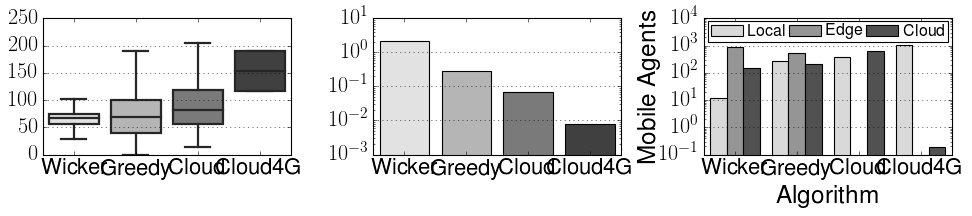

In [13]:
## this isn't very good imo
fig,axs = plt.subplots(1,3,figsize=(12,2.5))

sns.boxplot(x=LABELS, y=lat_list, ax=axs[0], showfliers=False, palette="Greys")
sns.barplot(x=LABELS, y=conv_list, ax=axs[1], palette="Greys")
sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=axs[2], palette="Greys")

axs[2].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2)
axs[1].set_yscale('log')
axs[2].set_yscale('log')
for ax in axs:
    ax.grid(axis='y')

axs[2].set_ylabel('Mobile Agents', labelpad=-0.6)

plt.tight_layout(pad=0)

In [136]:
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

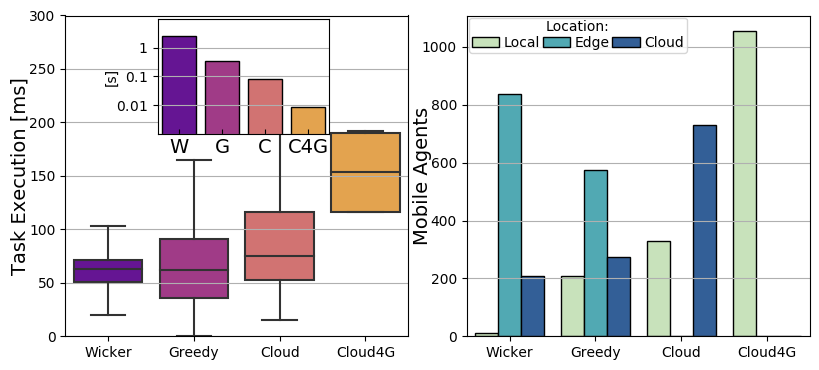

In [137]:
## my best choice, but too much info on the left
fig,axs = plt.subplots(1,2,figsize=(8,3.5))

sns.boxplot(x=LABELS, y=lat_list, ax=axs[0], showfliers=False, palette='plasma')
# sns.barplot(x=LABELS, y=conv_list, ax=axs[1], palette="Greys")
sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black")

axs[1].legend(ncol=3,borderpad=0.2, loc=2,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='Location:')
# axs[1].set_yscale('log')
#axs[1].set_yscale('log')
for ax in axs:
    ax.grid(axis='y')
    ax.set_xlabel('')

axs[0].set_ylabel('Task Execution [ms]', labelpad=0, fontsize=14)
axs[1].set_ylabel('Mobile Agents', labelpad=-7, fontsize=14)

axs[0].set_ylim(0, 300)

## inset
axin1 = axs[0].inset_axes([0.27, 0.63, 0.50, 0.36])
sns.barplot(x=LABELS, y=conv_list, ax=axin1, palette='plasma', edgecolor="black")
axin1.set_yscale('log')
axin1.set_xticklabels([])
axin1.set_xticklabels(['W','G','C', 'C4G'], fontsize=14)
axin1.tick_params(axis="x",direction="in", pad=2.5)
axin1.grid(axis='y')
#axin1.set_title('Convergence Time [s]', fontsize=12, pad=3)

yticks_ = [0.001,0.01,0.1,1,10]
axin1.set_yticks(yticks_)
axin1.set_yticklabels([ '${{ {} }}$'.format(t_) for t_ in yticks_ ],
                      fontsize=10)

axin1.set_ylabel('[s]', labelpad=-1.8)
yticks = axin1.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
yticks[-1].label1.set_visible(False)

yticks[0].tick1line.set_visible(False)
yticks[-1].tick1line.set_visible(False)

plt.tight_layout(pad=0, w_pad=0.3)
fig.savefig("../plots/baseline/comparison_small.pdf",  bbox_inches="tight")

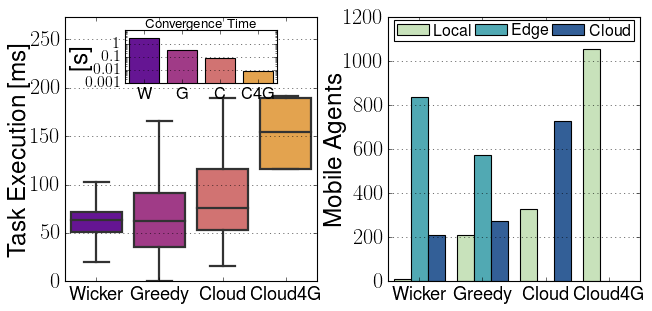

In [250]:
## my best choice, but too much info on the left
fig,axs = plt.subplots(1,2,figsize=(8,3.7))

sns.boxplot(x=LABELS, y=lat_list, ax=axs[0], showfliers=False, palette='plasma')
# sns.barplot(x=LABELS, y=conv_list, ax=axs[1], palette="Greys")
sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black",
            linewidth=1)

axs[1].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='')
# axs[1].set_yscale('log')
#axs[1].set_yscale('log')
for ax in axs:
    ax.grid(axis='y')
    ax.set_xlabel('')
    ax.xaxis.set_ticklabels(ax_.xaxis.get_ticklabels(), fontsize=16.5)

axs[0].set_ylabel('Task Execution [ms]', labelpad=-0.5, fontsize=22)
axs[1].set_ylabel('Mobile Agents', labelpad=-3, fontsize=22)

axs[0].set_ylim(0, 300)

## inset
axin1 = axs[0].inset_axes([0.24, 0.75, 0.6, 0.2])
sns.barplot(x=LABELS, y=conv_list, ax=axin1, palette='plasma', edgecolor="black",
            linewidth=1)
axin1.set_yscale('log')
axin1.set_xticklabels([])
axin1.set_xticklabels(['W','G','C', 'C4G'], fontsize=14.75)
axin1.tick_params(axis="x",direction="in", pad=2.5)
axin1.grid(axis='y')
axin1.set_title('Convergence Time', fontsize=12, pad=3)

yticks_ = [0.001,0.01,0.1,1,10]
axin1.set_yticks(yticks_)
axin1.set_yticklabels([ '${{ {} }}$'.format(t_) for t_ in yticks_ ],
                      fontsize=14.5)

axin1.set_ylabel('[s]', labelpad=-6.8)
yticks = axin1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

yticks[0].tick1line.set_visible(False)
yticks[-1].tick1line.set_visible(False)

axs[0].set_ylim(0,273)
axs[1].set_ylim(0,1200)

plt.tight_layout(pad=0, w_pad=-0.1)
fig.savefig("../plots/baseline/comparison_small.pdf",  bbox_inches="tight")

In [203]:
ax_ = axs[0]

[Text(0, 0, 'Wicker'),
 Text(1, 0, 'Greedy'),
 Text(2, 0, 'Cloud'),
 Text(3, 0, 'Cloud4G')]

In [26]:
df

,Algorithm,MA,Location
0,Wicker,9.66,Local
1,Wicker,837.96,Edge
2,Wicker,209.38,Cloud
3,Greedy,209.99,Local
4,Greedy,573.51,Edge
5,Greedy,273.50,Cloud
6,Cloud,328.40,Local
7,Cloud,0.00,Edge
8,Cloud,728.60,Cloud
9,Cloud4G,1056.03,Local


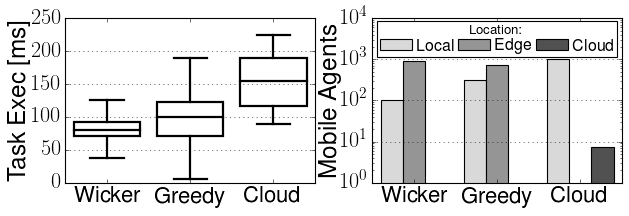

In [244]:
## second best, then you'll have to add text about convergence time
fig,axs = plt.subplots(1,2,figsize=(7.8,2.5))

sns.boxplot(x=LABELS, y=lat_list, ax=axs[0], showfliers=False, color='white')
# sns.barplot(x=LABELS, y=conv_list, ax=axs[1], palette="Greys")
sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=axs[1], palette="Greys")

axs[1].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='Location:')
# axs[1].set_yscale('log')
axs[1].set_yscale('log')
for ax in axs:
    ax.grid(axis='y')
    ax.set_xlabel('')

axs[0].set_ylabel('Task Exec [ms]', labelpad=0)
axs[1].set_ylabel('Mobile Agents', labelpad=-1.2)

# hacky shitty way to get boxes b&w
for i,box in enumerate(axs[0].artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    for j in range(6*i,6*(i+1)):
        if len(axs[0].lines) <= j:
            continue
        axs[0].lines[j].set_color('black')

plt.tight_layout(pad=0, w_pad=0.3)

In [246]:
k = [1,5,10,25,50,75,100,0]
LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]
result_kl = []

for ke in k:
    hp.local_search_scope = ke
    print("κ: {}".format(ke))
    
    for i in range(iterations):
        agents = generate_agents(MA, merged_raw_ap_data, dim)
        edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, dim)
        result_kl.append(start_solver(agents, edge_nodes, rtt_matrix, merged_raw_ap_data))

κ: 1
κ: 5
κ: 10
κ: 25
κ: 50
κ: 75
κ: 100
κ: 0


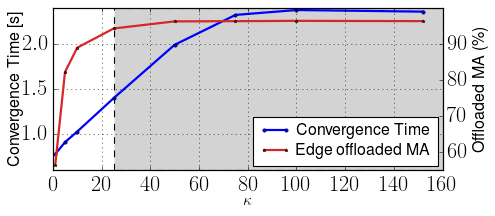

In [256]:
list_of_groups = zip(*(iter(result_kl),) * iterations)
LABELS = [1, 5, 10, 25, 50, 75, 100, TOTAL_EN]
conv_time = []
cov = []

fig, ax = plt.subplots(1, 1, figsize=(6, 2.5), constrained_layout=False)
# fig.tight_layout()

for re in list_of_groups:
    conv_time.append(np.median(list(map(lambda b: b[3], re))))
    
    agents = np.concatenate(list(map(lambda z: z[1], re))) 
    cov.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations / MA * 100)

    
ax.plot(LABELS, conv_time, marker="o", label="Convergence Time")
ax.set_ylabel("Convergence Time [s]", fontsize=14.5, labelpad=-1)
ax.set_xlabel("$\kappa$", fontsize=14.5, labelpad=-2)
#ax.set_title("Total EN: {} - Total MA: ~{}".format(TOTAL_EN, 1000), fontsize=12)
ax.grid()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Offloaded MA (\%)', fontsize=14.5)  # we already handled the x-label with ax1
ax2.plot(LABELS, cov, marker="*", color=color, label="Edge offloaded MA")
ax2.tick_params(axis='y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4,
          labelspacing=0.3, handletextpad=0.3,
                borderaxespad=0.3, columnspacing=0.2)

ax.axvspan(25,160,zorder=0, facecolor='lightgrey',
           linestyle='--')

yticks_ = [60, 70, 80, 90]
ax2.set_yticks(yticks_)

plt.tight_layout(pad=0)
fig.savefig("../plots/baseline/kappa_tradeoff.pdf",  bbox_inches="tight")